In [3]:
!pip install -q matplotlib

In [9]:
!ls ../data/baby_processed/test/label

04062021-090318_20210621145827_1.png  1B_0002_3.png    P111_0003_1.png
04062021-091633_20210621145827_2.png  1B_0002_4.png    P111_0003_2.png
04062021-095213_20210621145827_1.png  1B_0002_5.png    P111_0003_3.png
04062021-101206_20210621145827_2.png  1B_0002.png      P111_0003.png
09062021-082627_20210621145827_2.png  1B_0003_2.png    P111_0004.png
09062021-083317_20210621145827_2.png  1B_0003_3.png    P111_0005_1.png
09062021-095438_20210621145827_4.png  1B_0003_4.png    P111_0005.png
11062021-092211_20210621145827_2.png  1B_0003_5.png    P111_0006.png
11062021-092714_20210621145827_2.png  1B_0003_6.png    P111_0021.png
11062021-095005_20210621145827_2.png  1B_0003_7.png    SS_1B_0001_10.png
11062021-100430_20210621145827_2.png  1B_0003_8.png    SS_1B_0001_11.png
1B_0001_10.png			      I0000020_1.png   SS_1B_0001_12.png
1B_0001_12.png			      I0000020_2.png   SS_1B_0001_1.png
1B_0001_14.png			      I0000020_3.png   SS_1B_0001_2.png
1B_0001_15.png			      I0000020.png     SS_1B_0001_3.

torch.Size([1, 800, 1280])
torch.Size([1, 800, 1280]) tensor([0., 1.])


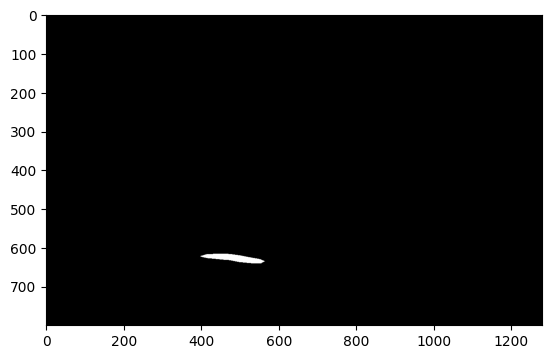

In [74]:
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from torchvision import transforms
import torch

WHITE_PIXEL = (253, 231, 36, 255)

def read_image(
        img_path, 
        greyscale=False, 
        scale_factor=255,
        preprocess=True
    ):
        """
        Read image from path as rgb
        Return tensor(1 x w x h): RGB image tensor
        """
        image = Image.open(img_path)
        
        if greyscale:
            image = ImageOps.grayscale(image)

        img_tensor = transforms.PILToTensor()(image)

        return img_tensor/scale_factor
    
def read_greyscale_label(img_path, preprocess=True):
    img_tensor = read_image(img_path, scale_factor=255., preprocess=False)
    print(img_tensor.shape)
    label_tensor = img_tensor
    # label_tensor = torch.all(img_tensor.permute(1,2,0) == torch.tensor(WHITE_PIXEL), dim=-1).unsqueeze(0).float()
    return label_tensor

label_path = "../data/baby_processed/test/label/1B_0002_3.png"
t = read_greyscale_label(label_path)
print(t.shape, t.unique())
plt.imshow(t[0], cmap="gray")

In [62]:
import glob
import os

def convert_labels(input_dir, output_dir):
    paths = glob.glob(input_dir)
    print(len(paths))
    for input_path in paths:
        label_tensor = read_greyscale_label(input_path)
        label_img = transforms.ToPILImage()(label_tensor)
        label_img.save(os.path.join(output_dir, os.path.basename(input_path)))
        
convert_labels("../data/baby/test/label_legacy/*.png", "../data/baby/test/label/")
convert_labels("../data/baby/val/label_legacy/*.png", "../data/baby/val/label/")
convert_labels("../data/baby/train/label_legacy/*.png", "../data/baby/train/label/")

97
torch.Size([4, 800, 1280])
torch.Size([4, 800, 1280])
torch.Size([4, 800, 1280])
torch.Size([4, 924, 1232])
torch.Size([4, 924, 1232])
torch.Size([4, 924, 1232])
torch.Size([4, 800, 1200])
torch.Size([4, 800, 1280])
torch.Size([4, 924, 1232])
torch.Size([4, 800, 1280])
torch.Size([4, 924, 1232])
torch.Size([4, 800, 1280])
torch.Size([4, 800, 1280])
torch.Size([4, 800, 1280])
torch.Size([4, 800, 1280])
torch.Size([4, 800, 1280])
torch.Size([4, 800, 1280])
torch.Size([4, 800, 1024])
torch.Size([4, 800, 1024])
torch.Size([4, 924, 1232])
torch.Size([4, 852, 1136])
torch.Size([4, 800, 1024])
torch.Size([4, 852, 1136])
torch.Size([4, 800, 1280])
torch.Size([4, 800, 1280])
torch.Size([4, 800, 1280])
torch.Size([4, 800, 1024])
torch.Size([4, 800, 1280])
torch.Size([4, 800, 1280])
torch.Size([4, 852, 1136])
torch.Size([4, 800, 1280])
torch.Size([4, 800, 1280])
torch.Size([4, 852, 1136])
torch.Size([4, 800, 1280])
torch.Size([4, 800, 1280])
torch.Size([4, 800, 1280])
torch.Size([4, 800, 1280]

In [51]:
os.path.join("../data/baby/test/label_legacy", "/*.png")

'/*.png'

In [ ]:
import cv2
    
# path
path = r'C:\Users\Rajnish\Desktop\geeksforgeeks\geeks.png'
    
# Reading an image in default mode
image = cv2.imread(path)
    
# Window name in which image is displayed
window_name = 'Image'
  
# font
font = cv2.FONT_HERSHEY_SIMPLEX
  
# org
org = (50, 50)
  
# fontScale
fontScale = 1
   
# Blue color in BGR
color = (255, 0, 0)
  
# Line thickness of 2 px
thickness = 2
   
# Using cv2.putText() method
image = cv2.putText(image, 'OpenCV', org, font, 
                   fontScale, color, thickness, cv2.LINE_AA)
   
# Displaying the image
cv2.imshow(window_name, image) 